In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Desktop/diamonds.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


C:\Users\Gwenn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


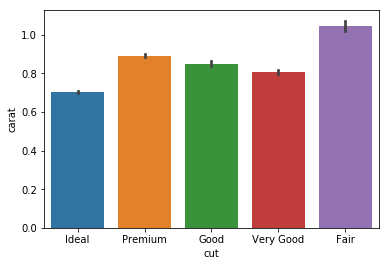

In [7]:
sns.barplot(x='cut',y='carat',data=df)

C:\Users\Gwenn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The average price is 3932.799721913237


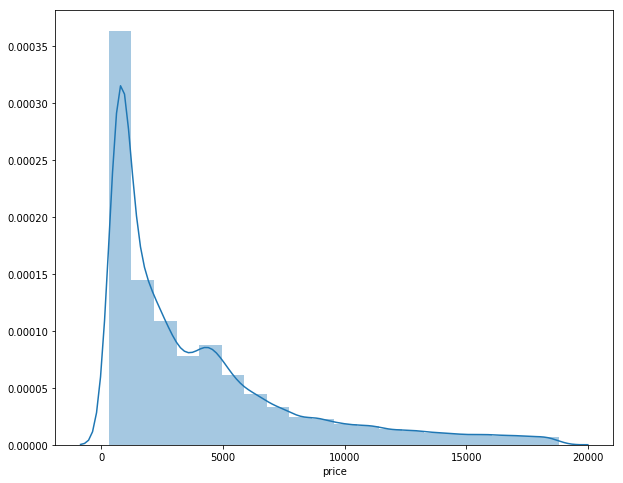

In [19]:
plt.figure(figsize=(10,8))
sns.distplot(df['price'],bins=20)
print('The average price is',df['price'].mean())

In [12]:
df.keys()

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

The quality split is 

 Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: cut, dtype: float64


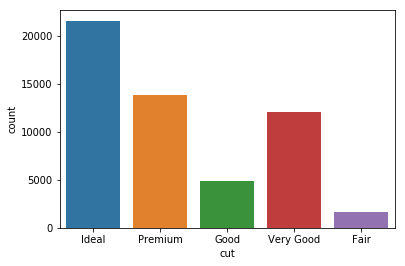

In [23]:
sns.countplot(df['cut'],data=df)
print('The quality split is ' '\n' '\n',df['cut'].value_counts(normalize=True))

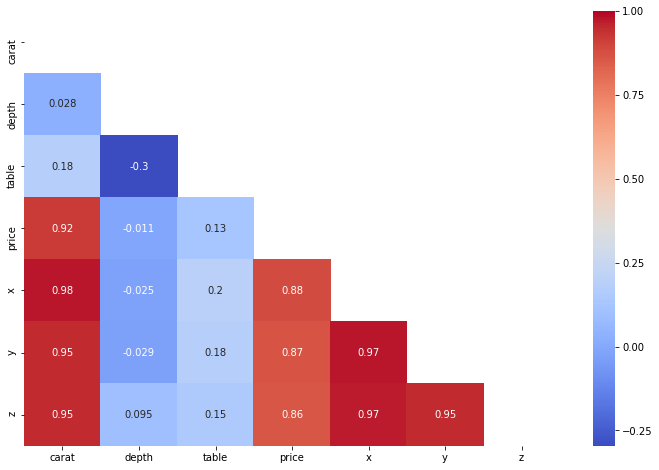

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,mask=np.triu(df.corr()))

C:\Users\Gwenn\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Gwenn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x720 with 0 Axes>

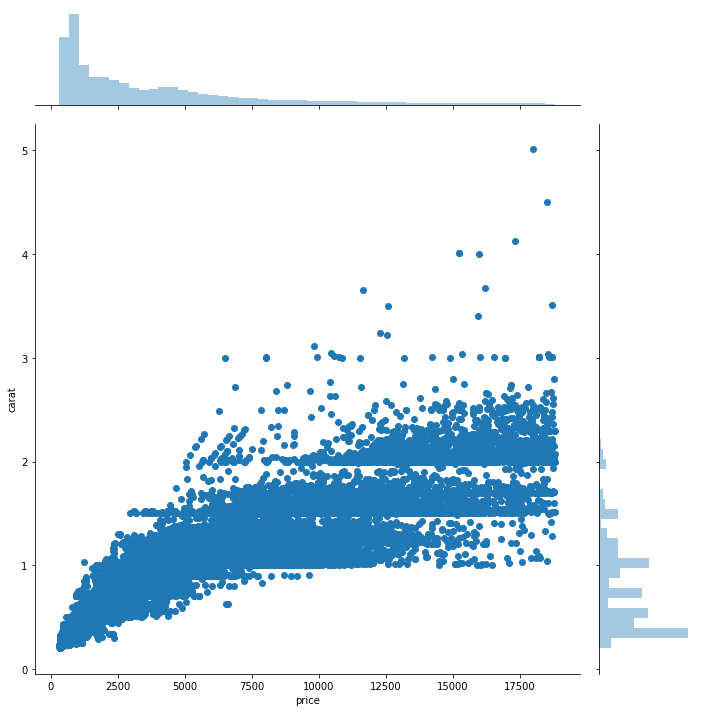

In [33]:
plt.figure(figsize=(15,10))
sns.jointplot(x=df['price'],y=df['carat'],data=df,size=10)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline

In [42]:
labelencoder=LabelEncoder()

In [43]:
df['cut']=labelencoder.fit_transform(df['cut'])

In [44]:
df['color']=labelencoder.fit_transform(df['color'])

In [45]:
df['clarity']=labelencoder.fit_transform(df['clarity'])

In [48]:
X=df.drop('price',axis=1)
y=df['price']

In [51]:
preproc=make_pipeline(StandardScaler(),Normalizer())

In [53]:
X=preproc.fit_transform(X)

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
lasso=Lasso()
ridge=Ridge()

In [56]:
lasso.fit(X,y)
ridge.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [57]:
print('Lasso Score:',lasso.score(X,y))
print('Ridge Score:',ridge.score(X,y))

Lasso Score: 0.8374724239361133
Ridge Score: 0.8375751432407638


In [61]:
print('Lasso Mean Squared Error:',mean_squared_error(y,lasso.predict(X)))
print('Ridge Mean Squared Error:',mean_squared_error(y,ridge.predict(X)))

Lasso Mean Squared Error: 2586680.7161958995
Ridge Mean Squared Error: 2585045.9041168964


In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [63]:
lr=LinearRegression()

In [64]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
pred=lr.predict(X_test)

In [66]:
print('MSE:',mean_squared_error(y_test,pred))

MSE: 2581714.3952314323


In [71]:
print('R2 Score:',lr.score(X_test,y_test))

R2 Score: 0.8375048255778035


In [72]:
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [73]:
pred=lasso.predict(X_test)

In [74]:
print('MSE:',mean_squared_error(y_test,pred))
print('Lasso Score:',lasso.score(X_test,y_test))

MSE: 2586080.3594104256
Lasso Score: 0.8372300282911256


In [75]:
ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [76]:
pred=ridge.predict(X_test)

In [78]:
print('MSE:',mean_squared_error(y_test,pred))
print('Ridge Score:',ridge.score(X_test,y_test))

MSE: 2583956.336218901
Ridge Score: 0.8373637160141445
